# Practice - Linear Regression

**!Recommend to view the notebook on Github!**  
Github Link :  https://github.com/heartcored98/CH485_AI_Chemistry/blob/master/Practice1_Diabate_LinearRegression/Assignment1_Diabate_LinearRegression.ipynb

This notebook would demonstrate the **linear regression** with sklearn package on diabetes dataset. **Firstly,** basic one variable linear regression were conducted among ten variables, plotting the data distribution with regression line. **Secondly,** linear regression with two features were conducted. **Lastly,** 10 variables linear regression was conducted. With thoese experiments, corresponding coefficient, mean squared error and r2 value were calculated.

### Load Diabetes Dataset  
Load diabetes dataset and split it into X and Y data.

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
diabetes = datasets.load_diabetes()
feature_name = ['Age', 'Sex', 'BMI', 'BP', 's1', 's2', 's3', 's4', 's5', 's6']

In [113]:
db_X = diabetes.data
db_Y = diabetes.target
print("Dataset Shape: {} | {} ".format(db_X.shape, db_Y.shape))

Dataset Shape: (442, 10) | (442,) 


### Linear Regressor  
Below function support multi-variate linear regression with given index of features. For example, index 2 means bmi feature. Full description of feature is shown below.

| Index | Feature | Index | Feature |
|:-----:|:-------:|:-----:|:-------:|
|   0   |   age   |   5   |    s2   |
|   1   |   sex   |   6   |    s3   |
|   2   |   bmi   |   7   |    s4   |
|   3   |    bp   |   8   |    s5   |
|   4   |    s1   |   9   |    s6   |

In [114]:
def multivar_lin_reg(list_features_index):
    db_x = db_X[:, list_features_index]
    x_train = db_x[:400, :]
    y_train = db_Y[:400]
    x_test = db_x[400:, :]
    y_test = db_Y[400:]
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    
    y_pred = regr.predict(x_test)
    mse_error = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return regr.coef_, regr.intercept_, mse_error, r2, x_test, y_test, y_pred

## Step1. Single Variable Regression

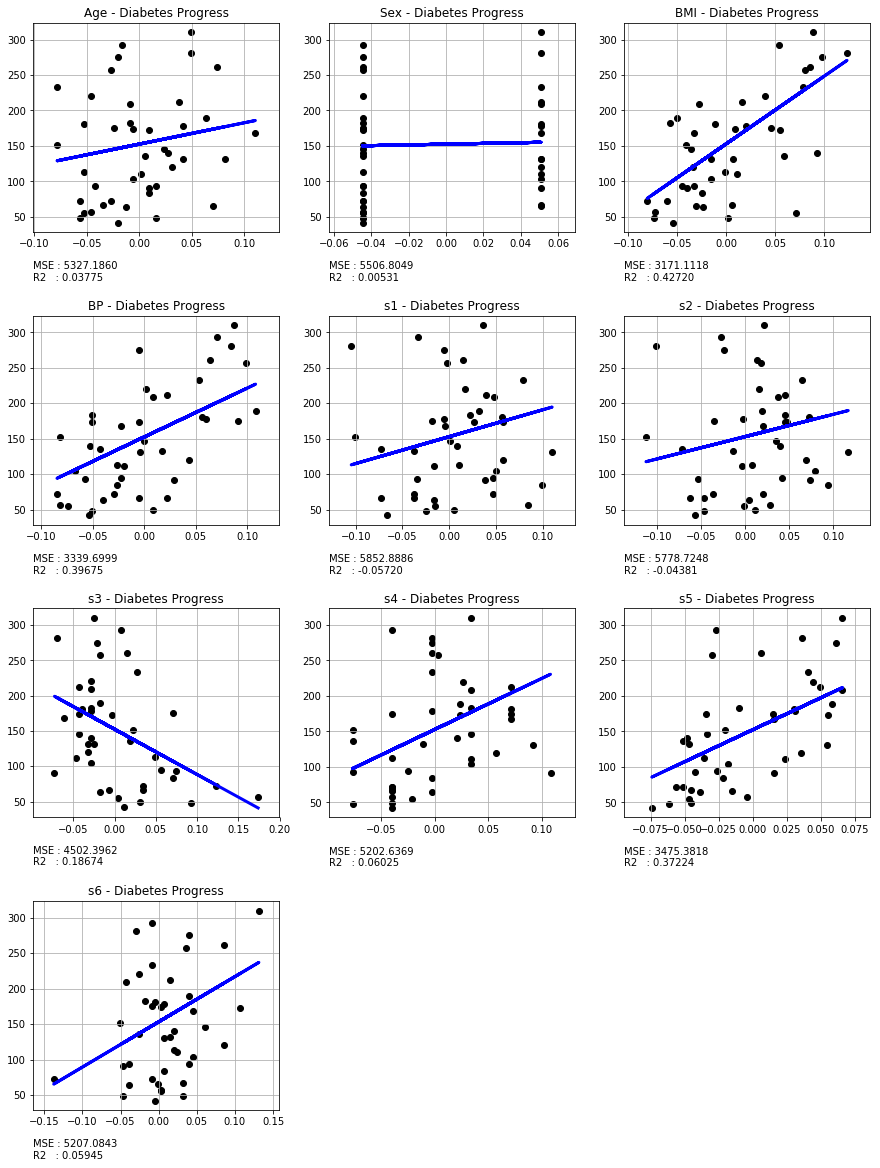

In [116]:
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for i in range(1, 11):
    # Initialize subplot
    ax = fig.add_subplot(4, 3, i)
    ax.set_title("{} - Diabetes Progress".format(feature_name[i-1]))
    ax.grid(True)
    
    # Linear regression on given variable
    coef, intercept, mse, r2, x_test, y_test, y_pred = multivar_lin_reg([i-1])
    ax.scatter(np.squeeze(x_test), y_test, color='black')
    ax.plot(x_test, y_pred, color='blue', linewidth=3)
    output_text = "MSE : {:5.4f}\nR2   : {:5.5f}".format(mse, r2)
    ax.text(ax.get_xlim()[0],-40, output_text)

## Step2. Two Variate Linear Regression

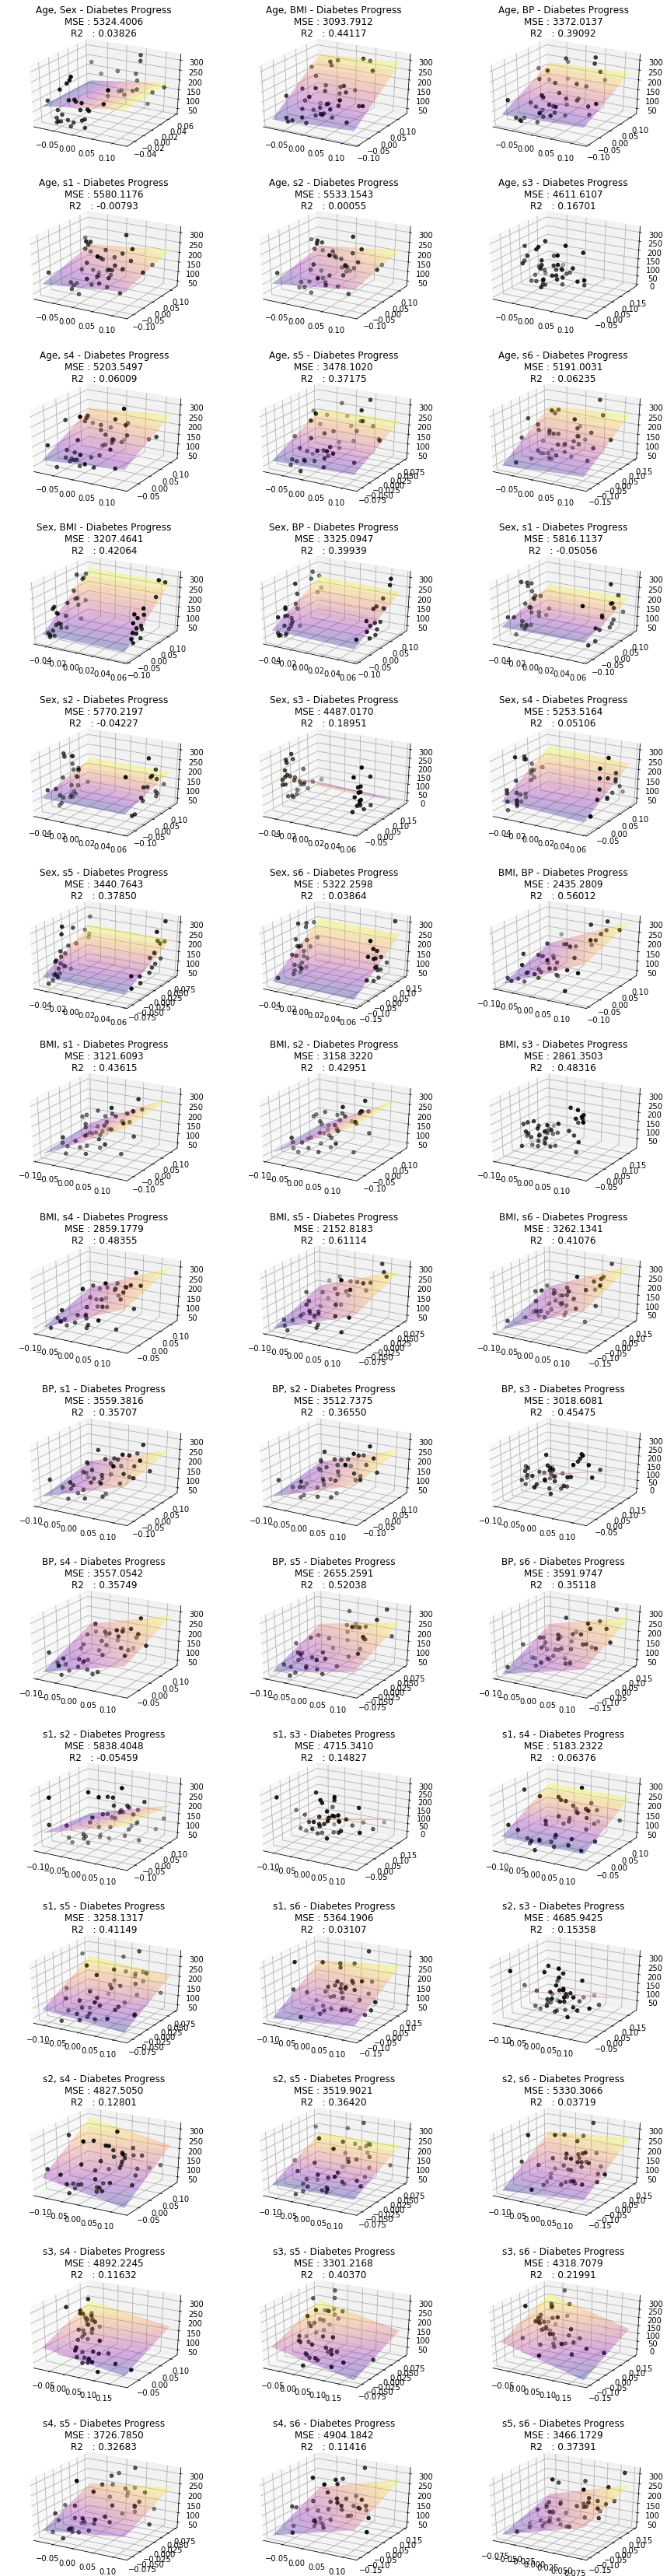

In [142]:
fig = plt.figure(figsize=(15,60))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
target_variable = [[i,j] for i in range(0, 10) for j in range(i+1, 10)]
for i, indices in enumerate(target_variable):
    # Initialize subplot
    ax = fig.add_subplot(15, 3, i+1, projection='3d')
    ax.grid(True)
    
    # Linear regression on given variable
    coef, intercept, mse, r2, x_test, y_test, y_pred = multivar_lin_reg(indices)
    ax.scatter(x_test[:,0], x_test[:,1], y_test, color='black')

    # Regression Plane
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10))
    z = intercept + coef[0] * xx + coef[1] * yy
    ax.plot_surface(xx, yy, z, alpha=0.3, antialiased=True, cmap='plasma')
    
    # Set Title and Regression Result
    output_text = "{}, {} - Diabetes Progress".format(feature_name[indices[0]], feature_name[indices[1]])
    output_text += "\nMSE : {:5.4f}\nR2   : {:5.5f}".format(mse, r2)
    ax.set_title(output_text)


## Step3. Ten Variables Linear Regression

In [152]:
indices = [i for i in range(10)]

# Linear regression on given variable
coef, intercept, mse, r2, x_test, y_test, y_pred = multivar_lin_reg(indices)

# Regression Result
print("======== Regression Result ========")
print("MSE : {:5.4f}".format(mse))
print("R2  : {:5.4f}".format(r2))
print("Intercept : {:5.5f}".format(intercept))
print("Coef:")
print(coef)
print("===================================")


======== Regression Result ========
MSE : 1668.7497
R2  : 0.6986
Intercept : 152.72943
Coef:
[   5.02597344 -238.41461528  521.63399624  299.94110951 -752.12376074
  445.15341214   83.51201877  185.57718337  706.4729074    88.68448421]
